# Dissolve Node
1 -> 1

Documentation: http://geopandas.org/aggregation_with_dissolve.html

Aggregeren met `dissolve` is vergelijkbaar met `groupby`, maar dan groepeer je op geografisch niveau.

*Note:* Pas `byColumn` aan naar de kolomnaam waarop gegroepeerd moet worden.

In [9]:
###
### USER DEFINED
###

# Group by welke kolom?
byColumn = 'segmentCode'

In [2]:
###
### HEADER
###
import geopandas as gpd
import pandas as pd
from shapely import wkt as WKT
import re
import numpy as np

# geopandas (geometry) to pandas (wkt)
def gdfToDf(gdf):
    df = pd.DataFrame(gdf, copy=True)
    df['wkt'] = gdf.geometry.apply(WKT.dumps, trim=True)
    df.drop(columns='geometry', inplace=True)
    return df

# pandas (wkt) to geopandas (geometry)
def dfToGdf(df):
    gdf = gpd.GeoDataFrame(df, copy=True)
    gdf['geometry'] = df.wkt.apply(WKT.loads)
    gdf.drop(columns='wkt', inplace=True)
    return gdf

# bereken wat extra info (vind ik interessant)
def extractInfo(wkt, *args):
    # calculate specs
    info = {'points': len(wkt.split(',')),\
            'chars': len(wkt),\
            'precision': np.mean([len(decimals) for decimals in re.findall('\.([0-9]*)', wkt)])}
    # return dictionary or list with values of one spec
    if not args:
        return info
    else:
        return info.get(args[0])

In [18]:
###
### DISSOLVE
###

# input
gdf = dfToGdf(input_table)
print('Shape input_table:', input_table.shape)
#print('Average # points/polygon: %.1f' % np.mean(input_table.wkt.apply(extractInfo, args=('points',))))

# group by and dissolve the geometry
gdf = gdf.dissolve(by=byColumn)

# reset index naar kolom
gdf.reset_index(inplace=True)

# output
output_table = gdfToDf(gdf)
print('Shape output_table:', output_table.shape)
#print('Average # points/polygon: %.1f' % np.mean(output_table.wkt.apply(extractInfo, args=('points',))))

Shape input_table: (380, 5)
Shape output_table: (2, 5)


In [19]:
###
### FOOTER
###
print('Preview output_table (first 5 rows):')
try:
    # try pretty print in Jupyter Notebook
    display(output_table.head())
except NameError:
    print(output_table.head())

Preview output_table (first 5 rows):


,segmentCode,id,code,gemeentena,wkt
0,0,1,0584,Oud-Beijerland,MULTIPOLYGON (((5.944128574752759 50.774086851...
1,1,20,1931,Krimpenerwaard,MULTIPOLYGON (((5.859968485978875 50.834518276...


## Testing and showing results
Don't add this in KNIME

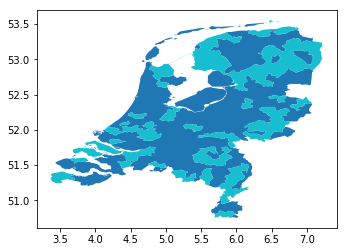

In [17]:
%matplotlib inline
gdf.reset_index().plot(column=byColumn)

## Load some input data to test the cells above
Run `Header` node first!

In [5]:
###
### SOURCE - ONLY FOR PREPARATION
###
from os.path import join
folder = '/home/ab/i/Open-data/shapefiles/shp-gemeente'
filename = 'gemeente-grenzen.shp'

# read the file
gdf = gpd.read_file( join(folder, filename) )
gdf = gdf.to_crs(epsg=4326)    # WGS84

# output
output_table = gdfToDf(gdf)

# copy output to input
input_table = output_table.copy()

,id,code,gemeentena,wkt
0,1,0584,Oud-Beijerland,"POLYGON ((4.389077541324618 51.81595048427736,..."
1,18,0160,Hardenberg,"POLYGON ((6.581660781672937 52.6705222681641, ..."
2,19,0327,Leusden,"POLYGON ((5.414567311519748 52.14943909543469,..."
3,20,1931,Krimpenerwaard,"POLYGON ((4.650163088417819 51.97439446940142,..."
4,21,1701,Westerveld,"POLYGON ((6.171951868202824 52.81632642248949,..."


In [7]:
# gebruik voor nu even het 1e getal in de kolom code om te groeperen. Ik weet niet of dat ook echt iets betekent...
input_table['segmentCode'] = input_table.code.str[:1]

# check
input_table.head()

,id,code,gemeentena,wkt,segmentCode
0,1,0584,Oud-Beijerland,"POLYGON ((4.389077541324618 51.81595048427736,...",0
1,18,0160,Hardenberg,"POLYGON ((6.581660781672937 52.6705222681641, ...",0
2,19,0327,Leusden,"POLYGON ((5.414567311519748 52.14943909543469,...",0
3,20,1931,Krimpenerwaard,"POLYGON ((4.650163088417819 51.97439446940142,...",1
4,21,1701,Westerveld,"POLYGON ((6.171951868202824 52.81632642248949,...",1
